In [2]:
!pip install scikit-survival
!pip install lifelines

     |████████████████████████████████| 349 kB 5.0 MB/s 
     |████████████████████████████████| 68 kB 6.0 MB/s 
     |████████████████████████████████| 38.1 MB 57.3 MB/s 
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4048 sha256=ad898163245860cc7912fee40ff1cbcdf317b32aba88e0017792c016d02fddb0
  Stored in directory: /root/.cache/pip/wheels/9f/01/ee/1331593abb5725ff7d8c1333aee93a50a1c29d6ddda9665c9f
Successfully built autograd-gamma
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [5]:
import pandas as pd
from lifelines import KaplanMeierFitter
import numpy as np

In [8]:
# Sometimes it works when ran twice

import sksurv
import sksurv.datasets

In [13]:
'''
Variable 	Name		Description			                Codes / Values
*******************************************************************************************************
1		     id		    Identification Number			    1 - 500
2		    age		    Age at Hospital Admission		    Years
3 	    	gender		Gender 					            0 = Male, 1 = Female
4    		hr		    Initial Heart Rate			        Beats per minute
5		    sysbp		Initial Systolic Blood Pressure 	mmHg
6	    	diasbp		Initial Diastolic Blood Pressure	mmHg
7    		bmi		    Body Mass Index			 	        kg/m^2
8		    cvd		    History of Cardiovascular Disease	0 = No, 1 = Yes						
9		    afb		    Atrial Fibrillation			        0 = No, 1 = Yes						
10  		sho		    Cardiogenic Shock			        0 = No, 1 = Yes						
11  		chf		    Congestive Heart Complications		0 = No, 1 = Yes						
12  		av3		    Complete Heart Block			    0 = No, 1 = Yes				
13  		miord		MI Order 				            0 = First, 1 = Recurrent
14  		mitype		MI Type 				            0 = non Q-wave, 1 = Q-wave
15  		year		Cohort Year				            1 = 1997, 2 = 1999, 3 = 2001				
16  		admitdate	Hospital Admission Date 		    mm/dd/yyyy
17  		disdate		Hospital Discharge Date 		    mm/dd/yyyy
18  		fdate		Date of last Follow Up 			    mm/dd/yyyy
19  		los		    Length of Hospital Stay			    Days from Hospital Admission
								 	                            to Hospital Discharge
20 	    	dstat		Discharge Status from Hospital		0 = Alive, 1 = Dead
21	    	lenfol		Total Length of Follow-up		    Days from Hospital Admission Date
									                            to Date of Last Follow-up 
22	    	event		Vital Status at Last Follow-up		0 = Alive 1 = Dead
'''

'\nVariable \tName\t\tDescription\t\t\t                Codes / Values\n*******************************************************************************************************\n1\t\t     id\t\t    Identification Number\t\t\t    1 - 500\n2\t\t    age\t\t    Age at Hospital Admission\t\t    Years\n3 \t    \tgender\t\tGender \t\t\t\t\t            0 = Male, 1 = Female\n4    \t\thr\t\t    Initial Heart Rate\t\t\t        Beats per minute\n5\t\t    sysbp\t\tInitial Systolic Blood Pressure \tmmHg\n6\t    \tdiasbp\t\tInitial Diastolic Blood Pressure\tmmHg\n7    \t\tbmi\t\t    Body Mass Index\t\t\t \t        kg/m^2\n8\t\t    cvd\t\t    History of Cardiovascular Disease\t0 = No, 1 = Yes\t\t\t\t\t\t\n9\t\t    afb\t\t    Atrial Fibrillation\t\t\t        0 = No, 1 = Yes\t\t\t\t\t\t\n10  \t\tsho\t\t    Cardiogenic Shock\t\t\t        0 = No, 1 = Yes\t\t\t\t\t\t\n11  \t\tchf\t\t    Congestive Heart Complications\t\t0 = No, 1 = Yes\t\t\t\t\t\t\n12  \t\tav3\t\t    Complete Heart Block\t\t\t    0 = No, 1 =

In [15]:
# load data
data, labels = sksurv.datasets.load_whas500()

In [16]:
data = data.astype(np.int32)
print(data.columns)

Index(['afb', 'age', 'av3', 'bmi', 'chf', 'cvd', 'diasbp', 'gender', 'hr',
       'los', 'miord', 'mitype', 'sho', 'sysbp'],
      dtype='object')


In [17]:
# total admission date + total follow up days
data['event'] = [label[0] for label in labels]
# data['time'] = [x.days for x in data.time]

data.head()

,afb,age,av3,bmi,chf,cvd,diasbp,gender,hr,los,miord,mitype,sho,sysbp,event
0,1,83,0,25,0,1,78,0,89,5,1,0,0,152,False
1,0,49,0,24,0,1,60,0,84,5,0,1,0,120,False
2,0,70,0,22,0,0,88,1,83,5,0,1,0,147,False
3,0,70,0,26,1,1,76,0,65,10,0,1,0,123,True
4,0,70,0,24,0,1,85,0,63,6,0,1,0,135,False


In [18]:
from lifelines import CoxPHFitter

cph = CoxPHFitter()

cph.fit(data, "los", event_col="event")
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 500 total observations, 285 right-censored observations>
             duration col = 'los'
                event col = 'event'
      baseline estimation = breslow
   number of observations = 500
number of events observed = 215
   partial log-likelihood = -1056.94
         time fit was run = 2022-05-13 20:28:04 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
afb        -0.41       0.66       0.18            -0.75            -0.06                 0.47                 0.94
age         0.05       1.05       0.01             0.03             0.06                 1.03                 1.07
av3         0.59       1.80       0.41            -0.22             1.39                 0.80                 4.03
bmi        -0.02       0.98       0.02            -0.05             0.01                 0.96                 1.01
chf         0.36       1.44       0.15             0.08             0.65                 1.08                 1.91
cvd        -0.10       0.90       0.18            -0.47             0.26                 0.63                 1.29
diasbp     -0.01       0.99       0.00            -0.02             0.00                 0.98                 1.00
gender     -0.23       0.79       0.14            -0.52             0.05                 0.60                 1.05
hr          0.01       1.01       0.00             0.00             0.01                 1.00                 1.01
miord       0.17       1.19       0.15            -0.11             0.46                 0.89                 1.59
mitype     -0.29       0.75       0.19            -0.65             0.08                 0.52                 1.09
sho        -0.11       0.90       0.27            -0.63             0.42                 0.53                 1.52
sysbp       0.00       1.00       0.00            -0.00             0.01                 1.00                 1.01

            cmp to     z      p   -log2(p)
covariate                                 
afb           0.00 -2.32   0.02       5.62
age           0.00  6.48 <0.005      33.39
av3           0.00  1.42   0.15       2.69
bmi           0.00 -1.03   0.30       1.73
chf           0.00  2.49   0.01       6.30
cvd           0.00 -0.57   0.57       0.81
diasbp        0.00 -1.74   0.08       3.61
gender        0.00 -1.61   0.11       3.22
hr            0.00  2.05   0.04       4.64
miord         0.00  1.19   0.24       2.08
mitype        0.00 -1.52   0.13       2.96
sho           0.00 -0.40   0.69       0.53
sysbp         0.00  0.95   0.34       1.55
---
Concordance = 0.72
Partial AIC = 2139.89
log-likelihood ratio test = 111.84 on 13 df
-log2(p) of ll-ratio test = 56.77

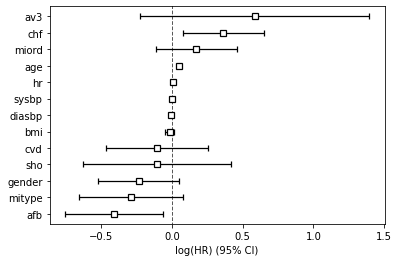

In [20]:
cph.plot()

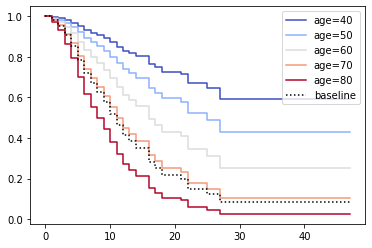

In [23]:
cph.plot_partial_effects_on_outcome(covariates = 'age', values = [40, 50, 60, 70, 80], cmap = 'coolwarm')

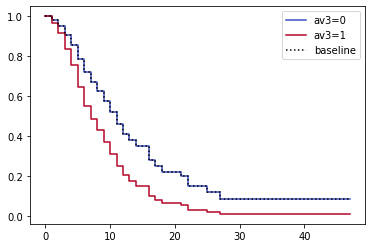

In [26]:
cph.plot_partial_effects_on_outcome(covariates = 'av3', values = [0,1], cmap = 'coolwarm')

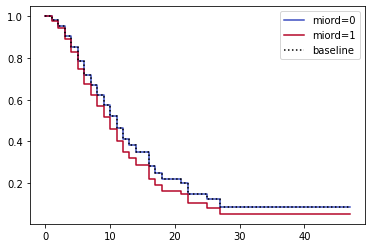

In [27]:
cph.plot_partial_effects_on_outcome(covariates = 'miord', values = [0,1], cmap = 'coolwarm')

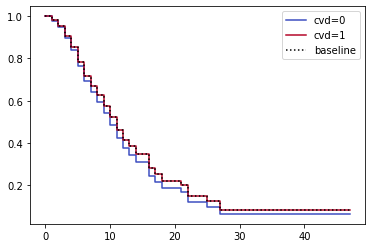

In [28]:
cph.plot_partial_effects_on_outcome(covariates = 'cvd', values = [0,1], cmap = 'coolwarm')

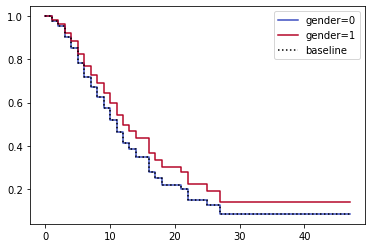

In [29]:
cph.plot_partial_effects_on_outcome(covariates = 'gender', values = [0,1], cmap = 'coolwarm')

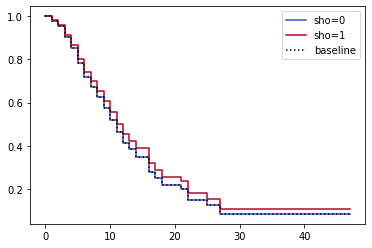

In [30]:
cph.plot_partial_effects_on_outcome(covariates = 'sho', values = [0,1], cmap = 'coolwarm')

In [25]:
cph.check_assumptions(data, p_value_threshold = 0.05)

Proportional hazard assumption looks okay.


/usr/local/lib/python3.7/dist-packages/lifelines/fitters/mixins.py:108: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  for variable in self.params_.index & (columns or self.params_.index):


[]